# Stock Market Prediction using Numerical and Textual Analysis
<img src= "stock.png">

   ### Importing Important Libraries

In [1]:
!pip install pandas_datareader
!pip install statsmodels
!pip install plotly
!pip install textblob
!pip install xgboost
!pip install matplotlib
!pip install lightgbm
!pip install nltk
!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns
import datetime
import pandas_datareader.data as web
import matplotlib as mpl
from matplotlib import style
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from textblob import TextBlob
from matplotlib.pyplot import figure
from matplotlib import rcParams
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm

### Importing Web Dataset

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.today()

In [3]:
stocks = web.DataReader("AAPL", 'yahoo', start, end)

In [4]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2953 entries, 2010-01-04 to 2021-09-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2953 non-null   float64
 1   Low        2953 non-null   float64
 2   Open       2953 non-null   float64
 3   Close      2953 non-null   float64
 4   Volume     2953 non-null   float64
 5   Adj Close  2953 non-null   float64
dtypes: float64(6)
memory usage: 161.5 KB


In [5]:
stocks.head(-5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.500339
...,...,...,...,...,...,...
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,148.119995
2021-09-15,149.440002,146.369995,148.559998,149.029999,83281300.0,149.029999


In [6]:
stocks.reset_index(inplace=True)

In [7]:
stocks.shape

(2953, 7)

In [8]:
stocks.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2953.000000,2953.000000,2953.000000,2953.000000,2.953000e+03,2953.000000
mean,40.484261,39.656563,40.073279,40.085790,2.744339e+08,38.372814
std,34.614089,33.808450,34.220235,34.226603,2.267849e+08,34.733595
min,7.000000,6.794643,6.870357,6.858929,4.544800e+07,5.889189
25%,18.392857,18.027500,18.216429,18.303213,1.118507e+08,15.934508
50%,28.162500,27.580000,27.937500,27.947500,1.882156e+08,25.820272
75%,47.209999,46.447498,46.805000,46.840000,3.759280e+08,45.401474
max,157.259995,154.389999,156.979996,156.690002,1.880998e+09,156.690002


### Data Preprocessing

In [9]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.500339


In [10]:
stocks.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

### Data Visualization
#### Closing Price of Stocks

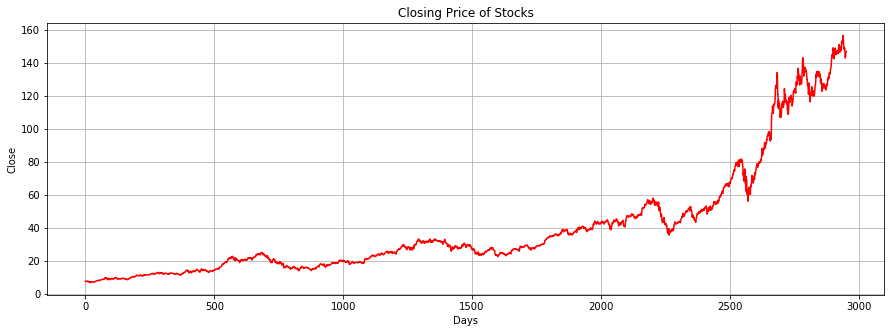

In [11]:
plt.figure(figsize=(15,5))
plt.title('Closing Price of Stocks')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(stocks['Close'], color='r')
plt.grid('True')
plt.show()

#### Opening Price of Stocks

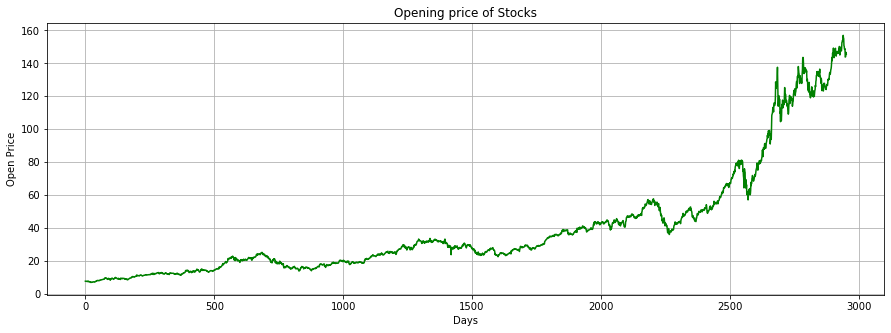

In [12]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(stocks['Open'], color='g')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.title('Opening price of Stocks')
plt.show()

#### Stock Returns

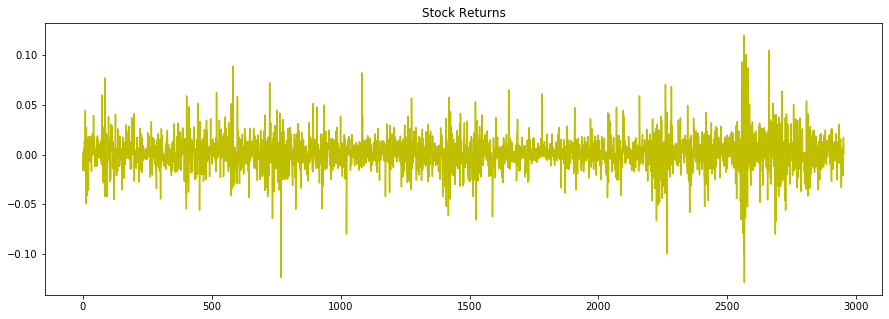

In [13]:
close = stocks['Close']
returns = close / close.shift(1) - 1
plt.figure(figsize = (15,5))
plt.title("Stock Returns")
returns.plot(label='Return', color = 'y')

### Dividing data into train and test set

In [14]:
train = stocks[:2064]
test = stocks[2064:]

In [15]:
train.shape, test.shape

((2064, 7), (889, 7))

### Dickey-Fuller test

In [16]:
def adfullerTest(X):
    result = adfuller(X,autolag = 'AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('No of Lags Used: %f' % result[2])
    print('Number of Obs Used: %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] <=0.05 :
         print("Reject against the null hypothesis, time series is stationary")
    else:
        print("Accept null hypothesis, time series is non-stationary ") 

In [17]:
adfullerTest(train['Close'])

ADF Statistic: 0.022913
p-value: 0.960386
No of Lags Used: 11.000000
Number of Obs Used: 2052.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Accept null hypothesis, time series is non-stationary 


#### Rolling Mean & SD

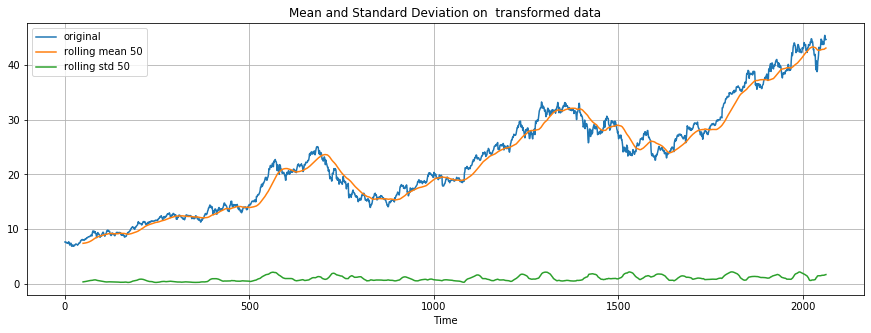

In [18]:
rolling_mean_50 = (train['Close']).rolling(window=50).mean()
rolling_std_50 = (train['Close']).rolling(window=50).std()
plt.figure(figsize = (15,5))
plt.plot((train['Close']), label = 'original')
plt.plot(rolling_mean_50, label = 'rolling mean 50')
plt.plot(rolling_std_50, label = 'rolling std 50')
plt.title('Mean and Standard Deviation on  transformed data')
plt.xlabel('Time')
plt.grid('True')
plt.legend()

#### Log Transfromation

In [19]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

In [20]:
from numpy import log
adfullerTest(log(train['Close']))

ADF Statistic: -1.664936
p-value: 0.449263
No of Lags Used: 13.000000
Number of Obs Used: 2050.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Accept null hypothesis, time series is non-stationary 


Text(0.5, 1.0, 'Mean and Standard Deviation on Log transformed data')

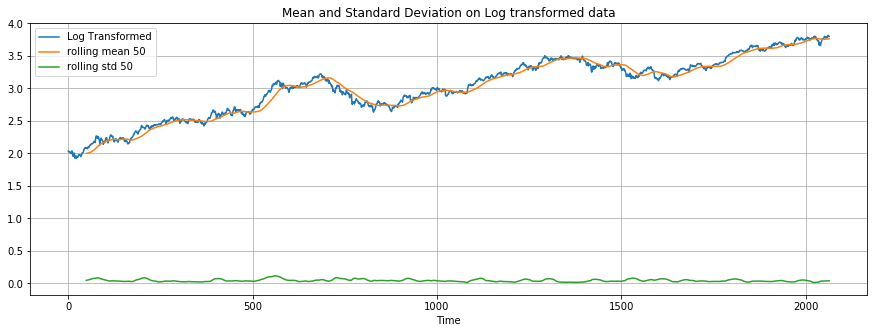

In [21]:
rolling_mean_50 = log(train['Close']).rolling(window=50).mean()
rolling_std_50 = log(train['Close']).rolling(window=50).std()
plt.figure(figsize = (15,5))
plt.plot(log(train['Close']), label = 'Log Transformed')
plt.plot(rolling_mean_50, label = 'rolling mean 50')
plt.plot(rolling_std_50, label = 'rolling std 50')
plt.xlabel('Time')
plt.grid('True')
plt.legend()
plt.title('Mean and Standard Deviation on Log transformed data')

####  First difference transformation of series to remove the linear trend

In [22]:
mean_log = log(train['Close']).rolling(50).mean()

In [23]:
train_log_diff = log(train['Close']) - mean_log
train_log_diff.dropna(inplace = True)
adfullerTest(train_log_diff)

ADF Statistic: -6.016431
p-value: 0.000000
No of Lags Used: 14.000000
Number of Obs Used: 2000.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject against the null hypothesis, time series is stationary


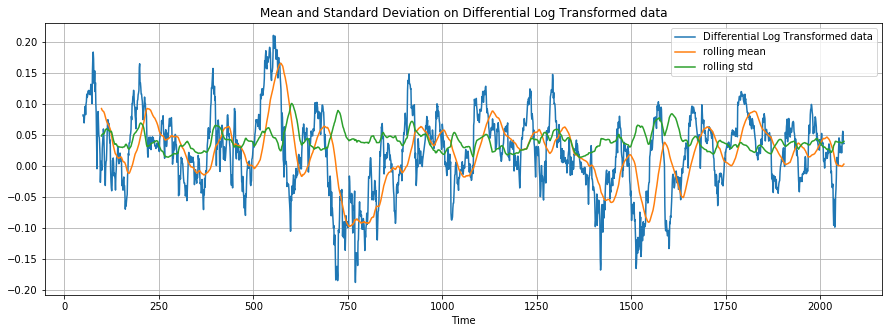

In [24]:
data = train_log_diff
mean = data.rolling(50).mean()
std = data.rolling(50).std()
plt.figure(figsize = (15,5))
plt.plot(data, label = 'Differential Log Transformed data')
plt.plot(mean, label = 'rolling mean')
plt.plot(std, label = 'rolling std')
plt.title('Mean and Standard Deviation on Differential Log Transformed data')
plt.xlabel('Time')
plt.grid('True')
plt.legend()

### Data Modelling using ARIMA Model 

In [25]:
!pip install pmdarima
import pmdarima as pmd
def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              trace=True,
                              error_action = 'ignore',
                              suppress_warnings = True)
    return autoarima_model

In [26]:
stocks_arima = arimamodel((train_log))
stocks_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11215.019, Time=2.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11217.014, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11216.485, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11216.506, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11213.082, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11214.515, Time=1.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.381 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2064
Model:               SARIMAX(0, 1, 0)   Log Likelihood                5610.507
Date:                Sat, 25 Sep 2021   AIC                         -11217.014
Time:                        12:00:53   BIC                         -11205.750
Sample:                             0   HQIC                        -11212.885
                               - 2064                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.000      2.426      0.015       0.000       0.002
sigma2         0.0003   4.29e-06     59.217      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.47   Jarque-Bera (JB):              2054.26
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

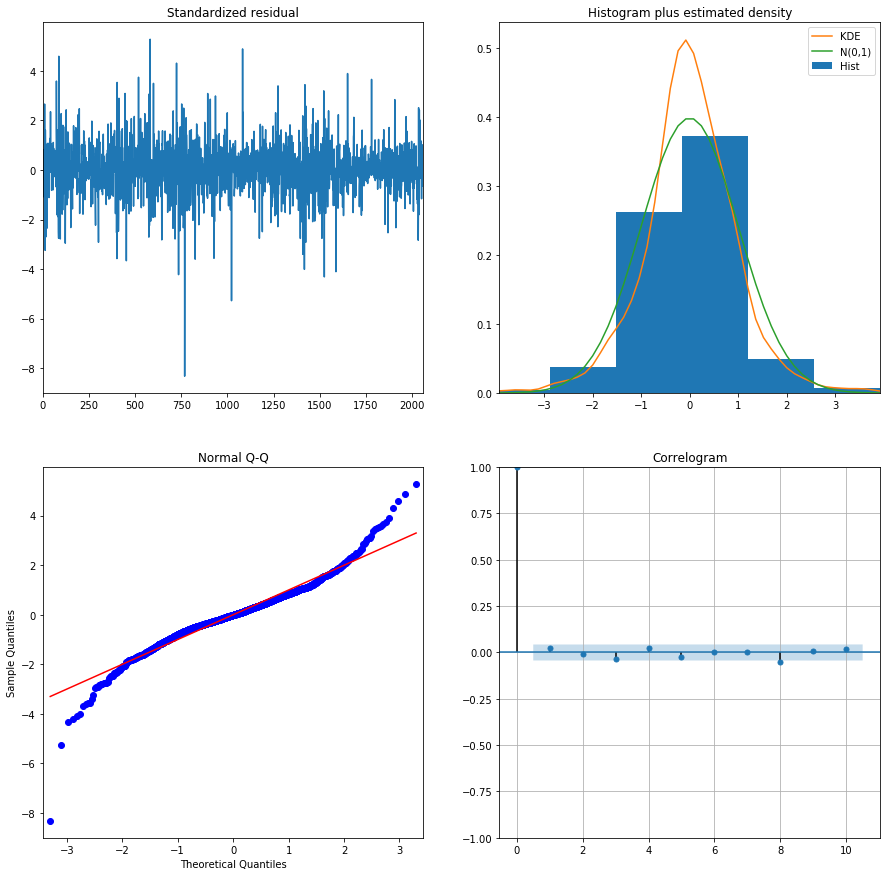

In [27]:
stocks_arima.plot_diagnostics(figsize=(15,15))
plt.grid('True')
plt.show()

### Model Prediction

In [28]:
predict_ClosePrice = stocks_arima.predict(n_periods = len(test_log))
predict_ClosePrice = pd.DataFrame(predict_ClosePrice,index = test_log.index,columns=['predict_ClosePrice'])

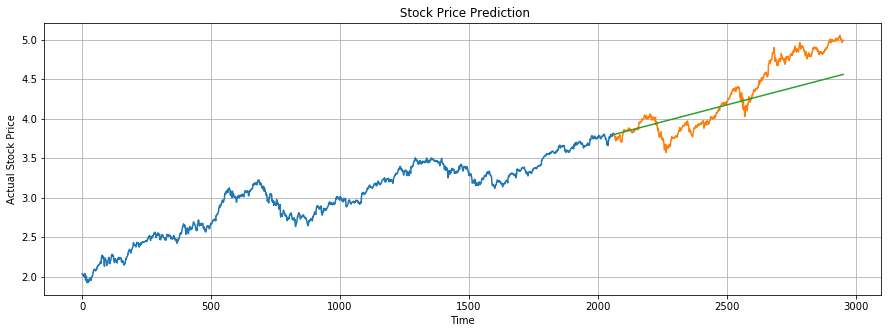

In [29]:
plt.figure(figsize = (15,5))
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predict_ClosePrice, label='Prediction')
plt.title(' Stock Price Prediction')
plt.ylabel('Actual Stock Price')
plt.xlabel('Time')
plt.grid('True')

### Model Evaluation

In [30]:
print('Mean Squared Error:',mean_squared_error(test_log, predict_ClosePrice))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(test_log, predict_ClosePrice)))
print('Mean Absolute Error:',mean_absolute_error(test_log, predict_ClosePrice))
print('R-Squared:',r2_score(test_log, predict_ClosePrice))

Mean Squared Error: 0.07368502398212647
Root Mean_Squared_Error: 0.2714498553731913
Mean Absolute Error: 0.22041292281021477
R-Squared: 0.6222681985755212


### Importing News Headlines Dataset

In [31]:
news=pd.read_csv("india-news-headlines.csv")

In [32]:
news.head(-5)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424057,20201231,india,50 NRIs reach Singhu; offer help to farmers
3424058,20201231,city.amritsar,Navjot Singh Sidhu tweets apology; says 'wore ...
3424059,20201231,city.bengaluru,Azim Premji organisation's name misused to che...
3424060,20201231,india,Get govt nod to probe officials: MP to agencies


In [33]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [34]:
news.describe()

,publish_date
count,3.424067e+06
mean,2.012659e+07
std,4.981132e+04
min,2.001010e+07
25%,2.009113e+07
50%,2.013092e+07
75%,2.017013e+07
max,2.020123e+07


### Data Preprocessing

In [35]:
news['publish_date'] = pd.to_datetime(news['publish_date'],format= '%Y%m%d')
news.head(-5)

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424057,2020-12-31,india,50 NRIs reach Singhu; offer help to farmers
3424058,2020-12-31,city.amritsar,Navjot Singh Sidhu tweets apology; says 'wore ...
3424059,2020-12-31,city.bengaluru,Azim Premji organisation's name misused to che...
3424060,2020-12-31,india,Get govt nod to probe officials: MP to agencies


In [36]:
news.isna().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

### Data Analysis

In [37]:
news['headline_category'].value_counts().head()

india                      288541
unknown                    209582
city.mumbai                134428
city.delhi                 127717
business.india-business    116761
Name: headline_category, dtype: int64

In [38]:
cities = news[news['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
cities.head(-5)

,publish_date,headline_category,headline_text
273,2001-01-04,city.bengaluru,Three in race for chief secy's post
274,2001-01-04,city.patna,Druggists' stir leads to shortage of medicines
277,2001-01-04,city.bengaluru,He's not so inscrutable
278,2001-01-04,city.delhi,DPCC stages Nyay rally
642,2001-01-10,city.patna,Fend for yourselves; Pande tells doctors
...,...,...,...
3424050,2020-12-31,city.mumbai,Today; BMC to station more 'Covid' marshals at...
3424051,2020-12-31,city.gurgaon,Couple shot dead in Rohtak; woman's uncle; rel...
3424054,2020-12-31,city.hyderabad,Another U-turn; Telangana to adopt Ayushman Bh...
3424056,2020-12-31,city.bengaluru,Four held in Bengaluru for trying to swap Rs 2...


In [39]:
city = pd.DataFrame(columns = ['city_name'])
city['city_name'] = cities.headline_category.str.split('.',expand = True)[1]
cities = pd.concat([cities, city], axis = 1)
cities.head()

,publish_date,headline_category,headline_text,city_name
273,2001-01-04,city.bengaluru,Three in race for chief secy's post,bengaluru
274,2001-01-04,city.patna,Druggists' stir leads to shortage of medicines,patna
277,2001-01-04,city.bengaluru,He's not so inscrutable,bengaluru
278,2001-01-04,city.delhi,DPCC stages Nyay rally,delhi
642,2001-01-10,city.patna,Fend for yourselves; Pande tells doctors,patna


In [40]:
cities.drop('headline_category', inplace =True,axis =1)

In [41]:
cities.head(-5)

,publish_date,headline_text,city_name
273,2001-01-04,Three in race for chief secy's post,bengaluru
274,2001-01-04,Druggists' stir leads to shortage of medicines,patna
277,2001-01-04,He's not so inscrutable,bengaluru
278,2001-01-04,DPCC stages Nyay rally,delhi
642,2001-01-10,Fend for yourselves; Pande tells doctors,patna
...,...,...,...
3424050,2020-12-31,Today; BMC to station more 'Covid' marshals at...,mumbai
3424051,2020-12-31,Couple shot dead in Rohtak; woman's uncle; rel...,gurgaon
3424054,2020-12-31,Another U-turn; Telangana to adopt Ayushman Bh...,hyderabad
3424056,2020-12-31,Four held in Bengaluru for trying to swap Rs 2...,bengaluru


In [42]:
cites = cities.groupby(cities['city_name']).agg({'headline_text':'count'})
cites.head()

,headline_text
city_name,
agartala,1183
agra,4884
ahmedabad,89513
ajmer,1587
allahabad,19285


In [43]:
cites.rename(columns = {'headline_text':'headline_count'}, inplace = True)

In [44]:
cites = cites.sort_values(by='headline_count',ascending=False)
cites.head()

,headline_count
city_name,
mumbai,134428
delhi,127717
chandigarh,110453
hyderabad,104692
bengaluru,93663


In [45]:
top10cites = cites.head(10)
top10cites

,headline_count
city_name,
mumbai,134428
delhi,127717
chandigarh,110453
hyderabad,104692
bengaluru,93663
ahmedabad,89513
pune,88590
lucknow,86275
kolkata,84616


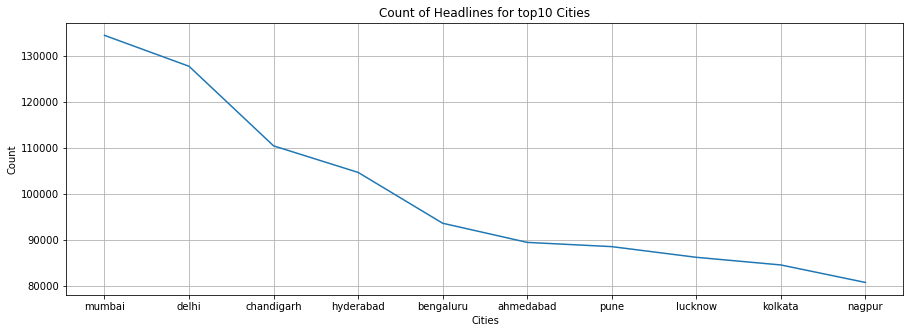

In [46]:
plt.figure(figsize=(15,5))
plt.title('Count of Headlines for top10 Cities')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.plot(top10cites)
plt.grid('True')
plt.show()

In [47]:
cities.head(-5)

,publish_date,headline_text,city_name
273,2001-01-04,Three in race for chief secy's post,bengaluru
274,2001-01-04,Druggists' stir leads to shortage of medicines,patna
277,2001-01-04,He's not so inscrutable,bengaluru
278,2001-01-04,DPCC stages Nyay rally,delhi
642,2001-01-10,Fend for yourselves; Pande tells doctors,patna
...,...,...,...
3424050,2020-12-31,Today; BMC to station more 'Covid' marshals at...,mumbai
3424051,2020-12-31,Couple shot dead in Rohtak; woman's uncle; rel...,gurgaon
3424054,2020-12-31,Another U-turn; Telangana to adopt Ayushman Bh...,hyderabad
3424056,2020-12-31,Four held in Bengaluru for trying to swap Rs 2...,bengaluru


In [48]:
categories = news.groupby(['headline_category']).agg({'headline_text':'count'}).sort_values(by='headline_text',ascending = False)
news_cat=categories.head(10)
news_cat.reset_index(inplace = True)
news_cat

,headline_category,headline_text
0,india,288541
1,unknown,209582
2,city.mumbai,134428
3,city.delhi,127717
4,business.india-business,116761
5,city.chandigarh,110453
6,city.hyderabad,104692
7,city.bengaluru,93663
8,entertainment.hindi.bollywood,91376
9,city.ahmedabad,89513


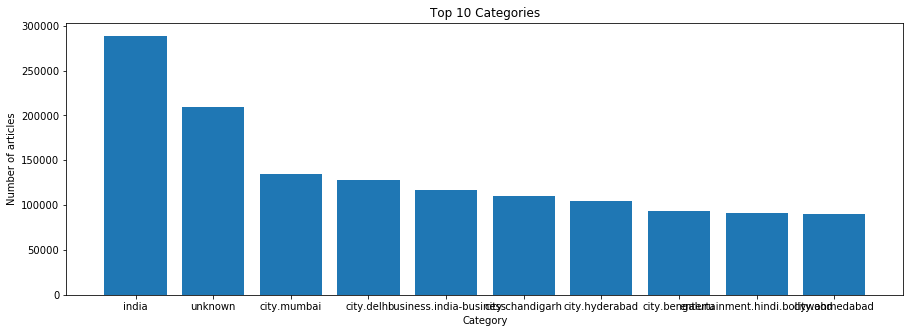

In [49]:
import matplotlib.colors as mcolors
plt.figure(figsize=(15,5))
plt.bar(news_cat.headline_category,height= news_cat.headline_text)
plt.xlabel('Category')
plt.ylabel('Number of articles')
plt.title('Top 10 Categories')
plt.show()

In [50]:
news.drop('headline_category', inplace  = True, axis =1)
news.head(-5)

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424057,2020-12-31,50 NRIs reach Singhu; offer help to farmers
3424058,2020-12-31,Navjot Singh Sidhu tweets apology; says 'wore ...
3424059,2020-12-31,Azim Premji organisation's name misused to che...
3424060,2020-12-31,Get govt nod to probe officials: MP to agencies


### Hybrid modelling by combining Stocks data and news data

In [51]:
news.rename(columns = {'publish_date':'Date'}, inplace = True)

In [52]:
df1 = pd.merge(stocks, news, how='inner', on=['Date'])
df1.head(-5)

,Date,High,Low,Open,Close,Volume,Adj Close,headline_text
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591,Bebo Khan't stop loving
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591,Chor Bazaari top song of 2009
2,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591,2010...movies; magic 'n' more!
3,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591,Ministers; Bollywood and cricket!
4,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591,Shabana gives a mind-blowing performance!
...,...,...,...,...,...,...,...,...
1767061,2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.069473,50 NRIs reach Singhu; offer help to farmers
1767062,2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.069473,Navjot Singh Sidhu tweets apology; says 'wore ...
1767063,2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.069473,Azim Premji organisation's name misused to che...
1767064,2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.069473,Get govt nod to probe officials: MP to agencies
